In [1]:
#Questions 3 and 4

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fuzzywuzzy import fuzz
import plotly.express as px
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

In [2]:
# Question 5(1)

gdp_df = pd.read_csv('../data/gdp_per_capita.csv', skipfooter = 2, engine = 'python')
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN
5,Afghanistan,2014,2102.385234,NaN
6,Afghanistan,2013,2116.465454,NaN
7,Afghanistan,2012,2075.491747,NaN
8,Afghanistan,2011,1904.559799,NaN
9,Afghanistan,2010,1957.029338,NaN


In [3]:
# Question 5(2)

gdp_df.tail(5)

,Country or Area,Year,Value,Value Footnotes
6863,Zimbabwe,1994,3263.934978,NaN
6864,Zimbabwe,1993,3033.504852,NaN
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN


In [4]:
# Question 6

gdp_df = gdp_df.drop(columns = "Value Footnotes")
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']

In [5]:
# Question 7

gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6868 entries, 0 to 6867
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6868 non-null   object 
 1   Year            6868 non-null   int64  
 2   GDP_Per_Capita  6868 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 161.1+ KB


In [6]:
# Question 8

gdp_df['Year'].value_counts().sort_index()

1990    207
1991    208
1992    209
1993    212
1994    214
1995    221
1996    221
1997    223
1998    223
1999    224
2000    231
2001    232
2002    233
2003    233
2004    234
2005    234
2006    235
2007    235
2008    235
2009    236
2010    236
2011    237
2012    237
2013    238
2014    238
2015    238
2016    238
2017    238
2018    237
2019    231
Name: Year, dtype: int64

Only years since 1990. Greater numbers of more recent years--better reporting?

In [7]:
# Question 9(1)

len(pd.unique(gdp_df['Country']))

238

In [8]:
# Question 9(2)

gdp_df['Country'].value_counts()

Lebanon                      30
Middle income                30
Morocco                      30
Mozambique                   30
Myanmar                      30
                             ..
Nauru                        16
Cayman Islands               13
Sint Maarten (Dutch part)    10
Turks and Caicos Islands      9
Djibouti                      7
Name: Country, Length: 238, dtype: int64

The least represented countries have very small populations and thus fewer workable samples. Those countries are also relatively remote.

In [9]:
# Question 10

gdp_2014 = gdp_df[gdp_df['Year'] == 2014]
gdp_2014

,Country,Year,GDP_Per_Capita
5,Afghanistan,2014,2102.385234
23,Albania,2014,11623.866679
53,Algeria,2014,11512.705405
83,Angola,2014,8239.828837
113,Antigua and Barbuda,2014,18104.241470
...,...,...,...
6727,Vietnam,2014,6098.489609
6757,West Bank and Gaza,2014,5967.073437
6783,World,2014,15189.648507
6813,Zambia,2014,3450.046561


In [10]:
# Question 11

gdp_2014.describe()

,Year,GDP_Per_Capita
count,238.0,238.000000
mean,2014.0,19766.710348
std,0.0,20983.869623
min,2014.0,822.610458
25%,2014.0,4753.110934
50%,2014.0,12209.385755
75%,2014.0,26803.610474
max,2014.0,156514.133850


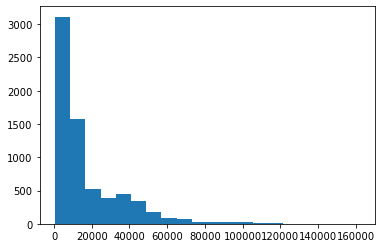

In [11]:
# Question 12

plt.hist(gdp_df['GDP_Per_Capita'], bins = 20);

Extremely right-skewed. The vast majority of the countries represented are poor, with outlier ("developed") countries skewing the data. The median is probably more representative than the mean with respect to typical country GDP per capita.

In [12]:
# Question 13(1)

gdp_2014.nlargest(5, columns = 'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
3721,"Macao SAR, China",2014,156514.133850
3691,Luxembourg,2014,108760.916030
5138,Qatar,2014,95578.416973
5464,Singapore,2014,87808.663157
561,Bermuda,2014,77361.104881


In [13]:
# Question 13(2)

gdp_2014.nsmallest(5, columns = 'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
1047,Central African Republic,2014,822.610458
827,Burundi,2014,886.235777
3781,Malawi,2014,1027.208496
1422,Dem. Rep. Congo,2014,1029.790785
4528,Niger,2014,1127.615541


In [14]:
# Question 14

gdp_pivoted = pd.pivot_table(data = gdp_df.loc[(gdp_df['Year'].isin([1990, 2017]))], 
                             index = ['Country'], 
                             columns = ['Year']).dropna()

In [15]:
# Question 15

gdp_pivoted['Percent_Change'] = 100*(gdp_pivoted[('GDP_Per_Capita', 2017)] - gdp_pivoted[('GDP_Per_Capita', 1990)])/ gdp_pivoted[('GDP_Per_Capita', 1990)]

In [16]:
# Question 16

gdp_pivoted.loc[gdp_pivoted['Percent_Change'] < 0].value_counts().sum()

17

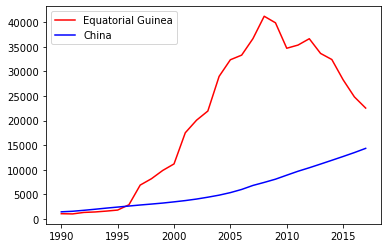

In [17]:
# Question 17 (includes bonus)

gdp_pivoted_sorted = gdp_pivoted.sort_values('Percent_Change', ascending = False)
top_change = str(gdp_pivoted_sorted['Percent_Change'].index[0])
second_top_change = str(gdp_pivoted_sorted['Percent_Change'].index[1])
top_change_values = gdp_df.loc[(gdp_df['Country'] == top_change) & (gdp_df['Year'] < 2018), ['Year','GDP_Per_Capita']]
second_top_change_values = gdp_df.loc[(gdp_df['Country'] == second_top_change) & (gdp_df['Year'] < 2018), ['Year','GDP_Per_Capita']]
plt.plot(top_change_values['Year'], top_change_values['GDP_Per_Capita'], color = 'red')
plt.plot(second_top_change_values['Year'], second_top_change_values['GDP_Per_Capita'], color = 'blue')
plt.legend(['Equatorial Guinea','China']);

Equatorial Guinea's GDP per capita rose sharply starting around 1995 but has started declining sharply since The Great Recession (~2007). While China's GDP per capita is lower overall, its growth has been steadier and more consistent over time.

In [18]:
# Question 18

continents = pd.read_csv('../data/continents.csv')

In [19]:
# Question 19

gdp_df = pd.merge(gdp_df, continents)

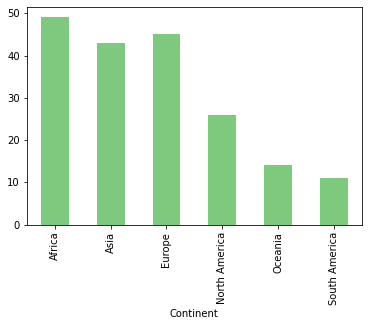

In [20]:
# Question 20

no_dupe_countries = gdp_df.drop_duplicates('Country')
no_dupe_countries.groupby('Continent')['Country'].count().plot(kind = 'bar', colormap = "Accent");

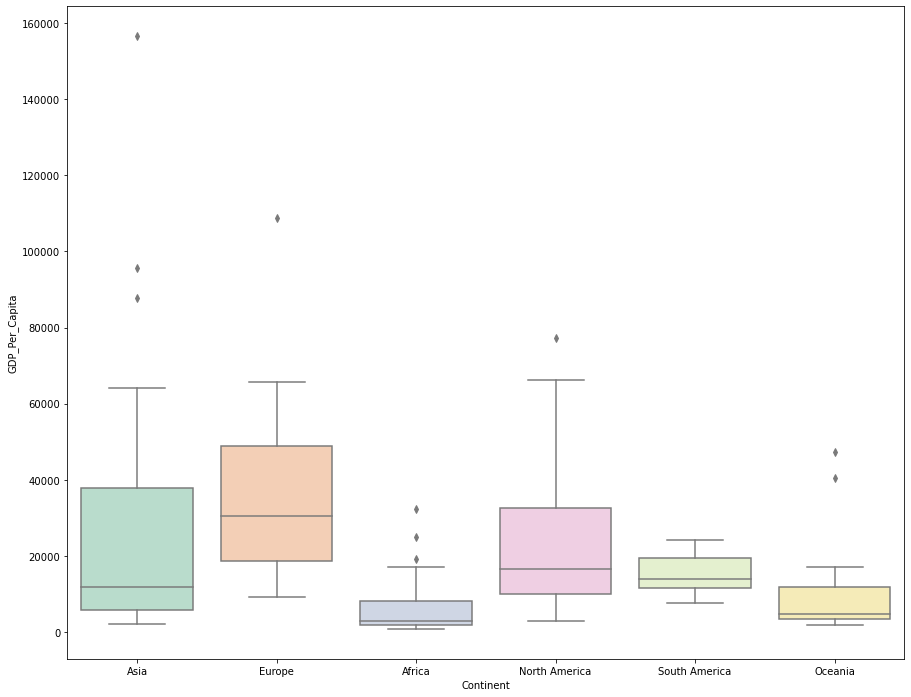

In [21]:
# Question 21

sns.boxplot(x = gdp_df['Continent'], y = gdp_df['GDP_Per_Capita'].loc[gdp_df['Year'] == 2014], palette = 'Pastel2')
fig = plt.gcf()
fig.set_size_inches(15, 12)

The 2014 GDPs per capita for countries in Europe were generally the highest among the continents (highest median and IQR). Those GDPs per capita were also normally distributed. The 2014 GDPs per capita for countries in Asia and North America had the greatest amount of variability, with a number of outliers on the high end. The 2014 GDPs per capita for countries in Africa were the lowest (lowest median and IQR) and had the least amount of variability.

In [22]:
# Question 22

internet_df = pd.read_csv('../data/internet_use.csv', on_bad_lines= 'skip', skipfooter = 181, engine = 'python')
internet_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
...,...,...,...,...
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN


In [23]:
# Question 23

internet_df = internet_df.drop(columns = "Value Footnotes")
internet_df.columns = ['Country', 'Year', 'Internet_Use_Pct']

In [24]:
# Question 24

internet_df['Internet_Use_Pct'].astype(float)
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           4495 non-null   object 
 1   Year              4495 non-null   int64  
 2   Internet_Use_Pct  4495 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 105.5+ KB


In [25]:
# Question 25(1)

used_years = internet_df.loc[internet_df['Internet_Use_Pct'] != 0].sort_values('Year').reset_index(drop = True)
used_years['Year'].iloc[0]

1990

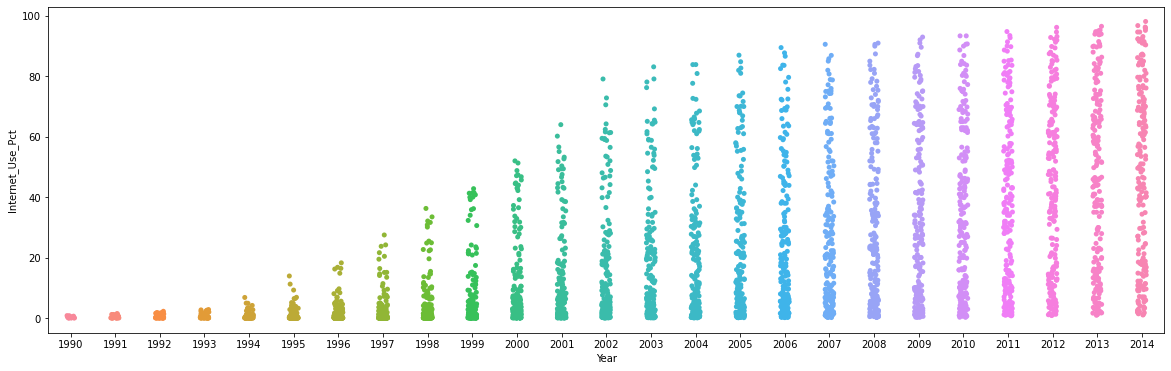

In [26]:
# Question 25(2)

x = used_years['Year']
y = used_years['Internet_Use_Pct']
sns.stripplot(x = x, y = y)
fig = plt.gcf()
fig.set_size_inches(20, 6)

In [27]:
# Questions 26 and 27 (bonus included)

# Clean-up function definition

def Country_Swap(target, acquirer):
    """Makes initial replacements of certain terms for eventual fuzzy matching and then fuzzy matches country names to improve dataframe merge results."""
    Swap_Out = ['Korea (Rep. of)', 'Democratic', 'Republic', 'Czechia', 'Slovakia', 'West Bank and Gaza', 'Kyrgyzstan', 'T.F.Y.R. Macedonia', 'Brunei Darussalam', 'Syrian Arab Rep.']
    Swap_In = ['Korea', 'Dem.', 'Rep.', 'Czech Rep.', 'Slovak Rep.', 'Palestine', 'Kyrgyz Rep.', 'North Macedonia', 'Brunei', 'Syria']
    for i in Swap_Out:
        acquirer['Country'] = acquirer['Country'].str.replace(i, Swap_In[Swap_Out.index(i)])
        target['Country'] = target['Country'].str.replace(i, Swap_In[Swap_Out.index(i)])
        
    banned_list = ['Australia', 'Austria', 'Iceland', 'Ireland', 'Congo', 'China']
    target_list = list(target['Country'].unique())
    acquirer_list = list(acquirer['Country'].unique())
    
    for i in target_list:
        for j in acquirer_list:
            if i not in acquirer_list:
                if (fuzz.ratio(i,j) >= 80) and (i not in banned_list) and (j not in banned_list):
                    target['Country'] = target['Country'].replace(to_replace = i, value = j)
                elif (fuzz.partial_ratio(i,j) >= 90) and (i not in banned_list) and (j not in banned_list):
                    target['Country'] = target['Country'].replace(to_replace = i, value = j)
                elif (fuzz.token_set_ratio(i,j) >= 90) and (i not in banned_list) and (j not in banned_list):
                    target['Country'] = target['Country'].replace(to_replace = i, value = j)
    return target, acquirer

In [28]:
# Performing the clean-up and merging

internet_df, gdp_df = Country_Swap(internet_df, gdp_df)
gdp_and_internet_use = pd.merge(gdp_df, internet_df, how = 'inner')

In [29]:
# Question 28

gdp_and_internet_use_2014 = gdp_and_internet_use.loc[gdp_and_internet_use['Year'].isin([2014])]
gdp_and_internet_use_2014['Country'].loc[gdp_and_internet_use_2014['Internet_Use_Pct'] > 90].count()

13

In [30]:
# Question 29(1)

criteria_one = gdp_and_internet_use_2014['GDP_Per_Capita'].nlargest(3).index
three_largest = list(gdp_and_internet_use_2014['Country'].loc[criteria_one])
three_largest

['Macao SAR, China', 'Luxembourg', 'Qatar']

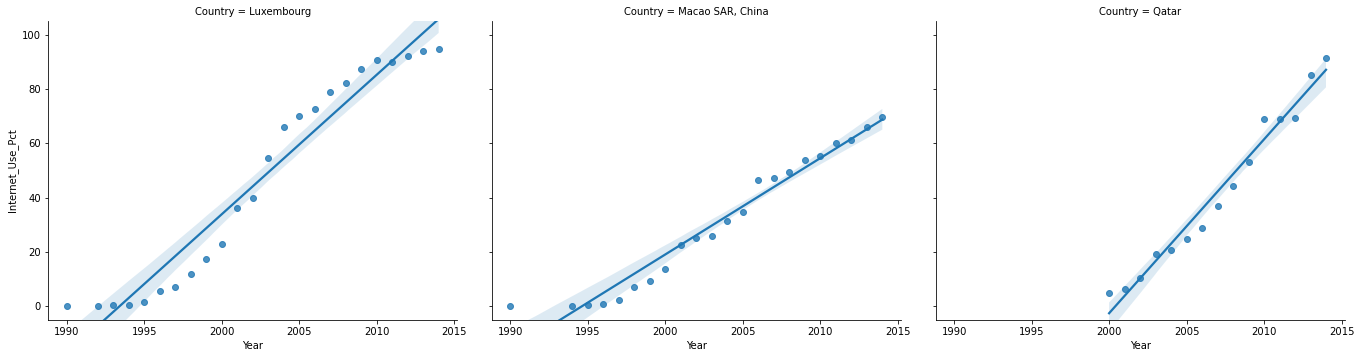

In [31]:
# Question 29(2)

criteria_two = gdp_and_internet_use['Country'].isin(three_largest)
slimmed_df_three_largest = gdp_and_internet_use[['Country', 'Year', 'Internet_Use_Pct']].loc[criteria_two]

graphs = sns.FacetGrid(slimmed_df_three_largest, col = 'Country')
graphs.map(sns.regplot, "Year", "Internet_Use_Pct")
graphs.set(ylim=(-5, 105))
fig = plt.gcf()
fig.set_size_inches(20, 6)

There is no data for Qatar before 2000: it's unclear whether that indicates that the population in Qatar simply didn't have access to the internet or just a limitation on the data. Otherwise, the internet use percentage has increased about the same amount for each country--quickly approaching 100%.

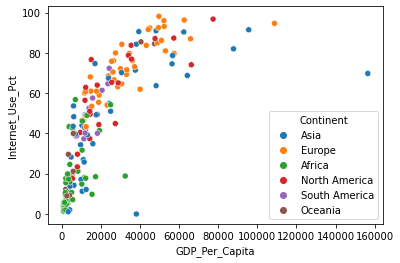

In [32]:
# Question 30

sns.scatterplot(x = gdp_and_internet_use_2014['GDP_Per_Capita'], 
                y = gdp_and_internet_use_2014['Internet_Use_Pct'], 
                hue = gdp_and_internet_use_2014['Continent']);

Internet use percentage quickly approaches 100% as GDP per capita for a country increases.

In [33]:
# Question 31

np.corrcoef(gdp_and_internet_use_2014['GDP_Per_Capita'], gdp_and_internet_use_2014['Internet_Use_Pct'])[0][1]

0.7465325566135791

Increase in GDP per capita of a country are strongly and positively correlated with an increase in internet use percentage of that country's population.

In [34]:
# Question 32

gdp_and_internet_use_2014['GDP_Per_Capita_Log'] = np.log(gdp_and_internet_use_2014['GDP_Per_Capita'])
np.corrcoef(gdp_and_internet_use_2014['GDP_Per_Capita_Log'], gdp_and_internet_use_2014['Internet_Use_Pct'])[0][1]

0.8803552704053378

The correlation is even stronger than what was shown previously (i.e., without log).

In [35]:
# Question 33

gaiu_us_only = gdp_and_internet_use.set_index('Country').filter(like = 'United States', axis = 0).sort_values('Year')
print(gaiu_us_only)
np.corrcoef(gaiu_us_only['GDP_Per_Capita'],gaiu_us_only['Internet_Use_Pct'])[0][1]

               Year  GDP_Per_Capita      Continent  Internet_Use_Pct
Country                                                             
United States  1990    40442.601132  North America          0.784729
United States  1991    39862.575565  North America          1.163194
United States  1992    40698.340183  North America          1.724203
United States  1993    41270.867304  North America          2.271673
United States  1994    42410.326048  North America          4.862781
United States  1995    43033.243518  North America          9.237088
United States  1996    44140.142786  North America         16.419353
United States  1997    45551.414805  North America         21.616401
United States  1998    47041.184778  North America         30.093197
United States  1999    48714.530554  North America         35.848724
United States  2000    50163.889468  North America         43.079163
United States  2001    50165.719941  North America         49.080832
United States  2002    50568.10110

0.9916600677832935

No, as changes to GDP per capita in the U.S. during this time have been marginal (likely due to inflation), and increase in internet usage is more likely due to its increased availability over time (more buildout of networks, e.g.).

In [36]:
# Writing csv files to data folder.

gdp_df.to_csv('../data/gdp_df_to_be_imported_and_merged.csv', index = False)
gdp_and_internet_use.to_csv('../data/gdp_and_internet_use_to_be_imported_and_merged.csv', index = False)